# Convolutional Neural Network Architecture for Character Recognition with the MNIST Dataset

## Assessment Details
- Student Name: M. I. Abrar Ahmed
- Module Code: 6COSC020C - Applied AI
- IIT ID: 20220503
- UOW ID: W1998830
- Coursework Domain: Speech & Text Recognition

## Introduction
The ability of the animal brain to percieve, recognize and categorize various symbols can be seen as an incredible biological feat. The speed of the near instant recognition and the robustness of the perceptual powers of the eye-brain pair at this task can served as a benchmark test of artificial intelligence systems. Indeed this task has remained a mainstay for those students starting to dabble in the scientific discipline of machine learning as well as with researchers who have been improving upon this field in a rapid manner throughout the past two decades. This paper will attempt to review the various advancements made within this field within the past two decades, review certain techniques that can be used to varying effect to perform character recognition, implement a robust and accurate Convolutional Neural Network (CNN) model and evaluate the performance of said model using the MNIST dataset.

## Application Area Review

Character recogition, also known as Optical Character Recognition (OCR), is a cornerstone of the field of computer vision. OCR is a technology with multiple applications, from being an important part of automating older systems such as bank cheques digitization, mail address digitization and license plate identification to being a versatile general purpose tool in the modern day that is efficiently integrated into low power mobile devices. The techniques used for OCR have evolved with time as more and more new research uncovered process optimizations and new methods entirely, for solving the task.

For the modern era, that is to say the start of the 21st century, the paper _Gradient-Based Learning Applied to Document Recognition_ by Yann Lecun can be considered to be a major milestone. The paper represents a break from previous techniques that relied heavily on manual feature extraction and sparse, if any, use of machine learning in character recognition tasks. The improved system proposed by the author is underpinned by a reliance on machine learning techniques such as _Gradient-Based Learning_, _Backpropagation_ and the combination of these methods in the construction of a _Convolutional Neural Network_ capable of classifying characters with a high degree of accuracy (Lecun et al., 1998). The automated feature extraction proposed here would prove to be a crucial finding as it would allow other classification techniques to improve their accuracy, in some cases reaching >99% on datasets such as MNIST as demonstrated by (Liu et al., 2003).

Although accuracy had already reached levels comparable to humans at this point, these were achieved with complex and less generalized neural network architectures, basic Multi-Layer Perceptrons (MLP) can be described as simple feed-forward neural networks with an input layer, output layer and several hidden layers in-between. Although conceptually simpler and more generalizable, shallow MLPs with few layers cannot come close to the accuracy of complex CNNs (Cireşan et al., 2010). However with the increased availability of GPUs and 'General Purpose Compute' libraries for them, the possibility of training deeper MLPs with a larger number of hidden layers became more feasible. Such 'Deep Learning' techniques were demonstrated to be able to match or exceed the performance of the SOTA CNNs at the time (Cireşan et al., 2010). These results showcased that as massively parallel compute in the form of GPUs continued advance in performance and affordability, the ability to train deeper networks would allow greater accuracy to be achieved in OCR tasks. The ability to train deeper and wider models would be a boon to all types of neural network architectures in general, including CNNs.

The next major breakthrough in the machine learning field would be the introduction of the 'Transformer' model architecture. The transformer architecture would solve longstanding issues around the scalability of machine learning models. A transformer architecture avoids the limitations seen in Recurrent Neural Networks, particularly the issue of maintaining context when processing dimensionally complex datapoints. It achieves this by processing data in a parallel sequence and relying on an 'Attention' mechanism to represent the relevance of each point in the sequence to the currently processed point (Vaswani et al., 2017). This architecture was initially intended for Natural Language Processing (NLP) tasks, however the transformer architecture was eventually applied to computer vision tasks as well, with strong results. The 'Vision Transformer' (ViT) model managed to match or exceed the accuracy of SOTA CNN architectures on certain image classification tasks (Dosovitskiy et al., 2020). The ViT model works by 'tokenising' a picture into small 16x16 pixel patches, these patches are then treated analogous to a word-token in an NLP context, this allows the model to 'see' parts of the image all at once (Dosovitskiy et al., 2020). Logically we can see a similarity with this "Image Patch Token" and the feature extraction performed by the convolution layers of a CNN. However it must be stressed that although the ViT model outperformed most CNN-based models, it was only able to do when trained on massive datasets consisting of 14 to 300 million images. For smaller datasets, and particularly for very small datasets such as MNIST, CNNs continue to perform the best (Dosovitskiy et al., 2020).

In the current landscape CNNs seem to offer the best accuracy with relatively modest datasets such as MNIST or EMNIST, this CNN architecture would incorporate many enhancements found since the initial milestone by Lecun et al. The modern CNN architecture would consist of Convolutional, ReLU Activation, Pooling and Fully Connected layers, the general approach is to increase the number of features extracted by having many convolution layers and repeating a `Convolution->Batch Normalization->ReLU->Pooling` stack for each convolution layer that is added, fully connected layers are kept to a minimum to improve model efficiency and resource usage, as extremely high accuracy can be reached with as little as two or three connected layers (El Ibrahimi et al., 2025). In addition to the model architecture 'Dropout' techniques are used during model training to improve generalization of the model and avoid overfitting.



## Computer Vision Techniques Comparison

There are many different potential techniques that can be used for computer vision, here three methods representing fairly different general approaches are taken into consideration, they are,

- K-Nearest Neighbour (KNN)
- Support Vector Machine (SVM)
- Convolutional Neural Network (CNN)

### K-Nearest Neighbour

KNN relies on calculating the distance between the feature vector of an input and a large number of labelled data points carried within the model. These data points are introduced into the model during the 'training' process, however it must be stressed that this process is unlike what is seen in other ML applications as the model does not attempt to learn any generalized patterns from the data but rather loads the data itself as it's ruleset. When classifying an input value, `K` number of the closest vectors are taken into account, the highest number of repeated classes found within this `K` number of vectors determines the class of the input value. The feature vector for the datapoint is dependent on the specific implementation of KNN, it may be a large dimensional representation of each corresponding pixel value between the input and model data, it may also be a computed, estimate value such as the average value of all pixels in the image. The exact method of extracting the feature vector is important as it can drastically alter the performance of the model.

The primary advantage of KNNs are that they essentially require no training iterations as 'training' is really a data load. Conversely KNNs have very undesirable performance characteristics during inference as the distance from the input to each point in the dataset needs to be calculated, this is computationally expensive and scales linearly with the size of the dataset, which restricts the amount of data that can be practically used to train the model.

### Support Vector Machine

An SVM classifies data by calculating the position of the feature vector for that data point in a high dimensional space, this position is compared relative to a 'Hyperplane' that is computed during training. The hyperplane is a plane in a lower dimension compared to the feature vector, it divides the two data classes the model was trained on with a margin on either side. During training the positioning of the hyperplane is calculated by finding the vectors that are closest to a class boundary, these are the 'Support Vectors' mentioned. These vectors represent a delineation space between the two classes.

Relative to KNN, an SVM is able to provide much faster inference due to not having to calculate the distance between the input feature vector and a full dataset. SVMs also typically use less memory as they can discard the training data points after training and only store the support vectors.

### Convolutional Neural Network

CNNs can be considered to be the gold standard for computer vision with small to medium scale datasets. A CNN contains multiple 'Convolution' layers that are used to generate feature maps of the input data. This is achieved by performing multiple convolution operations over the input image with various kernels. These feature maps are able to extract features such as lines, contours, edges and even basic shapes that occur in the input image. These maps are then passed through to one more connected layers that consist of neurons with weights and bias values. The activation of the neurons based on the input value, weight and bias are passed through until it is consolidated into the number of output classes in the final output layer of the network. CNNs are trained on a set of data by repeatedly passing the data through the network, calculating the loss of the model using various algorithms and then tweaking the weights of the model using an algorithm called 'Backpropagation'.

As seen previously, CNNs are considered to be the golden standard for character recognition tasks due to their ability to generalize well over a dataset and perform with high accuracy. Due to these reasons the implementation in this paper will be a CNN model.

## Implementation

Given below is the architecture of the implemented neural network.

![Model Architecture](./images/AI%20CW.png)

In [69]:
import torch
import torch.nn as tnn
import torchvision as tvision
import torch.optim as toptim

import matplotlib.pyplot as plt

In [70]:
# Setup a config parameter for automaticaly choosing between CPU/GPU compute depending on whether a NVIDIA CUDA capable GPU is present
COMPUTE_DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

torch.device(COMPUTE_DEVICE)

device(type='cuda')

In [71]:
# Setup dataset parameters
TRAIN_BATCH_SIZE = 32
EVAL_BATCH_SIZE = 1000
MEAN = 0.5
STD_DEV = 0.5

## Dataset and Input

The dataset chosen for training and evaluating this model is the MNIST dataset (ylecun/mnist · Datasets at Hugging Face, 2024). This is a popular dataset that is widely used for testing and benchmarking OCR tasks with various techniques. It is a collection of 70,000 labelled images of handwritten digits labelled from 0 to 9. Each image in the MNIST set is sized 28 pixels wide and 28 pixels tall, the strokes for each character are centered within a 20x20 centered area in the image. The images are also in single channel grayscale, which greatly simplifies the amount of processing required for training as well as makes it easier to learn geometric features of the digits.

Ultimately the expected input image for the CNN is a 2D tensor with length 28 in each dimension. Access to the dataset is conveniently provided by the `torchvision` module. This does make the integration of this dataset much more convenient and also opens the possibility to switch to another more complex dataset if required, with minimal changes to the rest of the code.

### Pre-Processing and Data Augmentation

Prior to using the dataset to train the model or perform any inferencing, the dataset it converted from a Python `pillow` image object to a `torch` tensor, this conversion automatically handles another required transformation, that is to normalize each pixel's values between 0 and 1. However for optimal training performance it is also advisable that the mean value and standard deviation of all pixels in an image is also normalized to between 0 and 1. This is achieved with the code snippet given below, where the mean of the whole training dataset is calculated as well as standard deviation, these values are then applied to the actual training dataset as a transformation.

In addition to normalizing pixel values, the dataset is also augmented by applying random rotations as well as perspective shifts on each image. This is a technique to avoid the model overfitting to the exact location of strokes in characters.

In [72]:
# Calculate the mean and std dev from the dataset
train_set = tvision.datasets.MNIST(root="./dataset", train=True, transform=tvision.transforms.ToTensor(), download=True)

flattened_data = torch.stack([img for img, _ in train_set])

MEAN = flattened_data.view(1, -1).mean(dim=1).item()
STD_DEV = flattened_data.view(1, -1).std(dim=1).item()

print(f"MEAN: {MEAN}")
print(f"STD_DEV: {STD_DEV}")

MEAN: 0.13066047430038452
STD_DEV: 0.30810782313346863


In [82]:
train_transforms = tvision.transforms.Compose(
    [
        tvision.transforms.ToTensor(),
        tvision.transforms.RandomRotation(15),
        tvision.transforms.RandomPerspective(0.1),
        tvision.transforms.Normalize(MEAN, STD_DEV)
    ]
)

eval_transforms = tvision.transforms.Compose(
    [
        tvision.transforms.ToTensor(),
        tvision.transforms.Normalize(MEAN, STD_DEV)
    ]
)

# Load the dataset
training_set = tvision.datasets.MNIST(root="./dataset", train=True, transform=train_transforms, download=True)
evaluation_set = tvision.datasets.MNIST(root="./dataset", train=False, transform=eval_transforms, download=True)

training_set_loader = torch.utils.data.DataLoader(training_set, batch_size=TRAIN_BATCH_SIZE, shuffle=True)
evaluation_set_loader = torch.utils.data.DataLoader(evaluation_set, batch_size=EVAL_BATCH_SIZE, shuffle=False)

# label_character_map = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
label_character_map = "0123456789"

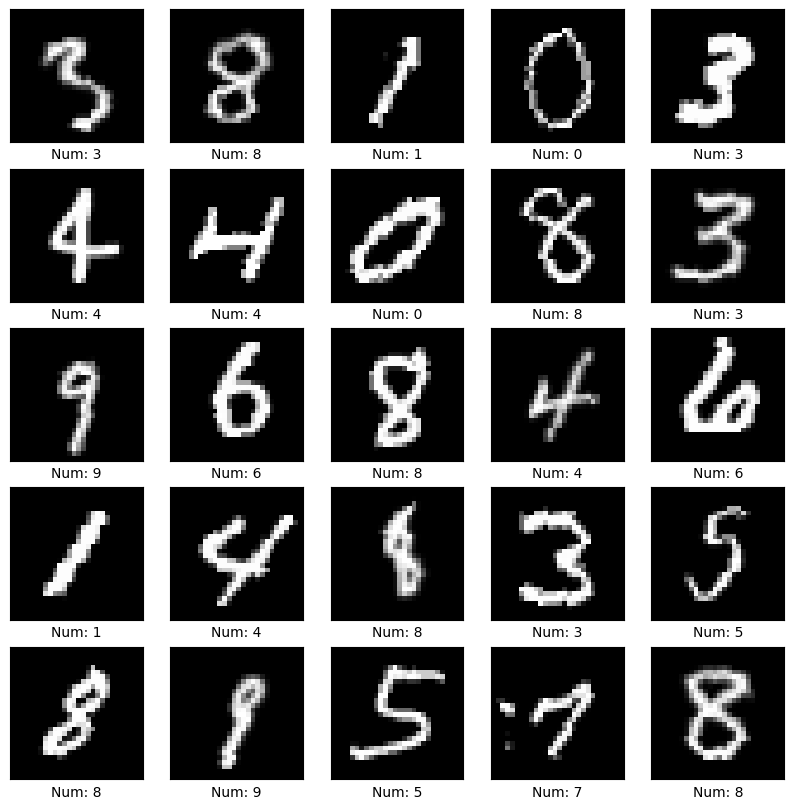

In [83]:
# Get a copy of the data loader so that it can be iterated without affecting the training
train_set_imgs, train_set_labels = next(iter(training_set_loader))

# Display a single training batch
plt.figure(figsize=(10, 10))

for i in range(25):
    img = train_set_imgs[i]
    lbl = train_set_labels[i]

    plt.subplot(5, 5, i + 1)
    plt.xlabel(f"Num: {label_character_map[lbl]}")
    plt.imshow(img.numpy().squeeze(), cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

plt.show()

## Model Setup

The following codeblock defines the model architecture mapped out in the previous diagram, the architecture of the CNN generally follows the modern best practices in a scaled down manner to further ease the hardware requirements for training and inference. As discussed earlier the CNN follows an architecture whereby one or more convolution layers are stacked with increasing feature layer counts in order to find and extract complex and discriminative features among the dataset. This is passed through a batch normalization layer to reduce the potential of the 'vanishing gradient' issue (El Ibrahimi et al., 2025). The Rectified Linear Unit or ReLU activation function layer introduces non-linearity in the model, allowing it to potentially memorize more complex patterns. Finally there is a 'Fully Connected' layer that is tuned in the course of training to optimize the general digit recognition capability.

There is also a call to the `Dropout(0.2)` function seen here, this ensures that during training around 20% of the network's neurons in the fully connected layers are deactivated. This is done to force the neurons to learn generalized patterns instead of overfitting the activation to the training data (Srivastava et al., 2014).

In [90]:
# Setup the model layers
model = tnn.Sequential(
    tnn.Conv2d(1, 8, 3, 1, 1),
    tnn.BatchNorm2d(8),
    tnn.ReLU(),
    tnn.MaxPool2d(2, 2),

    tnn.Conv2d(8, 16, 3, 1, 1),
    tnn.BatchNorm2d(16),
    tnn.ReLU(),
    tnn.MaxPool2d(2, 2),

    tnn.Flatten(),
    tnn.Linear(16 * 7 * 7, 128), # img is 7x7 after going through two 2x2 pooling layers, multiplied then by the number of feature layers
    tnn.ReLU(),
    tnn.Dropout(0.2),
    tnn.Linear(128, len(label_character_map)) # The output layer count matches the number of output classes, 10 for full MNIST
).to(COMPUTE_DEVICE)

The following block initializes the hyperparameters for the model training process as well as performs the training iterations itself. The `EPOCH` variable controls the number of training iterations performed, the `BASE_LEARNING_RATE` defines the value that is used to perform gradient descent during the optimization step. The `LEARNING_RATE_GAMMA` defines the factor of the learning rate for each `LEARNING_RATE_STEP_SIZE` number of epochs elapsed, this allows the model to start off with a higher learning rate at the start of the training iterations when the weights may be far away from a global or local minima in the activation function. This ultimately means that the optimizer is performing large changes at the begining when it is advantageous to do so as a speedup method and then tapering off as we get closer to the minimum, and avoid overshooting the minimum.

In [91]:
# Hyperparams
EPOCHS = 10
BASE_LEARNING_RATE = 0.0001
LEARNING_RATE_GAMMA = 0.9
LEARNING_RATE_STEP_SIZE = 2

# Setup optimizer, loss and learning rate scheduler functions
loss_func = tnn.CrossEntropyLoss()
optimizer = toptim.Adam(model.parameters(), lr=BASE_LEARNING_RATE)
lr_sched = toptim.lr_scheduler.StepLR(optimizer=optimizer, gamma=LEARNING_RATE_GAMMA, step_size=LEARNING_RATE_STEP_SIZE)

# Track the loss during training and evaluation together
training_losses = []
evaluation_losses = []

for epoch in range(EPOCHS):
    print("="*20)
    print(f"Epoch: {epoch + 1}/{EPOCHS}")

    # Ensure node dropout is active by switching to train mode
    model.train()

    train_correct_predictions = 0
    train_total_predictions = 0
    train_epoch_loss = 0.0

    with torch.enable_grad():
        for img_batch, lbl_batch in training_set_loader:
            # Send the data to the GPU VRAM if one is available
            img_batch = img_batch.to(COMPUTE_DEVICE)
            lbl_batch = lbl_batch.to(COMPUTE_DEVICE)

            optimizer.zero_grad()

            batch_outputs = model(img_batch)

            batch_loss = loss_func(batch_outputs, lbl_batch)
            train_epoch_loss += batch_loss.item()

            prediction_confidence, predicted_classes = torch.max(batch_outputs, 1)

            train_total_predictions += lbl_batch.size(0)
            train_correct_predictions += (predicted_classes == lbl_batch).sum().item()

            batch_loss.backward()
            optimizer.step()


        lr_sched.step()
        print(f"Train Model Accuracy: {100 * (train_correct_predictions/train_total_predictions):.2f}")
        print(f"Train Loss: {train_epoch_loss/len(training_set_loader)}")
        print(f"Learning Rate: {lr_sched.get_last_lr()}")

    # Ensure model is in evaluation mode to perform inference
    # Full network available, no node dropout
    model.eval()

    eval_correct_predictions = 0
    eval_total_predictions = 0
    eval_epoch_loss = 0.0

    with torch.no_grad():
        for img_batch, lbl_batch in evaluation_set_loader:
            img_batch = img_batch.to(COMPUTE_DEVICE)
            lbl_batch = lbl_batch.to(COMPUTE_DEVICE)

            batch_outputs = model(img_batch)

            batch_loss = loss_func(batch_outputs, lbl_batch)
            eval_epoch_loss += batch_loss.item()

            prediction_confidence, predicted_classes = torch.max(batch_outputs.data, 1)

            eval_total_predictions += lbl_batch.size(0)
            eval_correct_predictions += (predicted_classes == lbl_batch).sum().item()

    print(f"Eval Model Accuracy: {100 * (eval_correct_predictions/eval_total_predictions):.2f}%")
    print(f"Eval Loss: {eval_epoch_loss/len(evaluation_set_loader)}")

    training_losses.append((train_epoch_loss/len(training_set_loader)))
    evaluation_losses.append((eval_epoch_loss/len(evaluation_set_loader)))
    

Epoch: 1/10
Train Model Accuracy: 86.22
Train Loss: 0.5032375593165557
Learning Rate: [0.0001]
Eval Model Accuracy: 96.47%
Eval Loss: 0.11955708749592305
Epoch: 2/10
Train Model Accuracy: 95.05
Train Loss: 0.16641021527051925
Learning Rate: [9e-05]
Eval Model Accuracy: 97.78%
Eval Loss: 0.07280132975429296
Epoch: 3/10
Train Model Accuracy: 96.28
Train Loss: 0.12243049537017942
Learning Rate: [9e-05]
Eval Model Accuracy: 98.27%
Eval Loss: 0.05643332693725824
Epoch: 4/10
Train Model Accuracy: 96.87
Train Loss: 0.10162330723802249
Learning Rate: [8.1e-05]
Eval Model Accuracy: 98.36%
Eval Loss: 0.050690227560698985
Epoch: 5/10
Train Model Accuracy: 97.36
Train Loss: 0.08741253896281123
Learning Rate: [8.1e-05]
Eval Model Accuracy: 98.72%
Eval Loss: 0.04025746993720532
Epoch: 6/10
Train Model Accuracy: 97.53
Train Loss: 0.0787262387342751
Learning Rate: [7.290000000000001e-05]
Eval Model Accuracy: 98.78%
Eval Loss: 0.03813880835659802
Epoch: 7/10
Train Model Accuracy: 97.78
Train Loss: 0.07

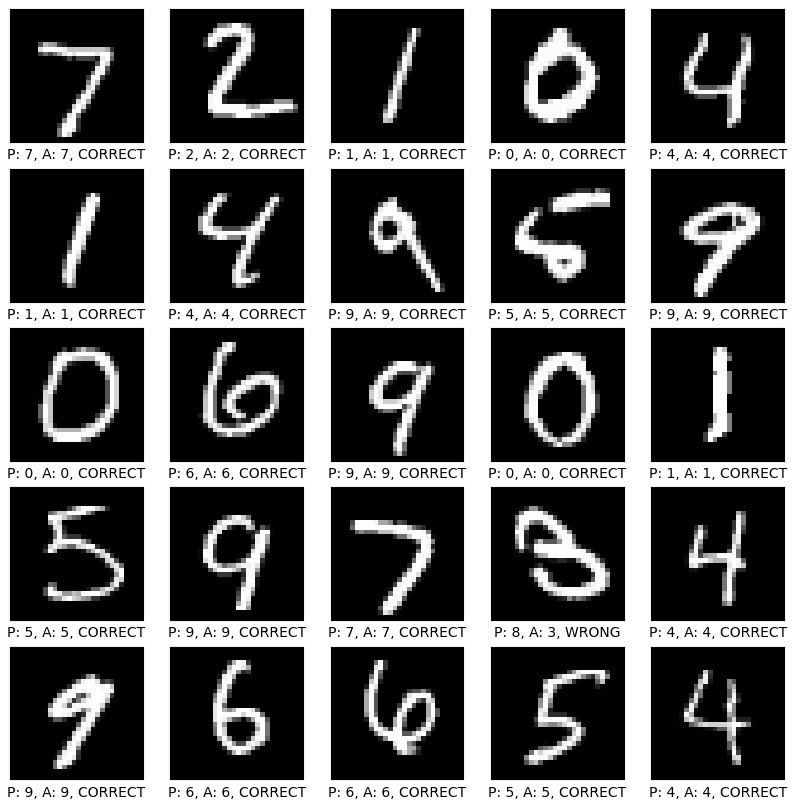

In [92]:
with torch.no_grad():
    model.eval()
    img_batch, lbl_batch = next(iter(evaluation_set_loader))

    img_batch = img_batch.to(COMPUTE_DEVICE)
    lbl_batch = lbl_batch.to(COMPUTE_DEVICE)

    batch_outputs = model(img_batch)
    prediction_confidence, predicted_classes = torch.max(batch_outputs, 1)

    plt.figure(figsize=(10, 10))

    for i in range(25):
        img = img_batch[i]
        lbl = lbl_batch[i]
        pred_class = predicted_classes[i]

        plt.subplot(5, 5, i+1)
        plt.xlabel(f"P: {label_character_map[pred_class]}, A: {label_character_map[lbl]}, {"CORRECT" if pred_class == lbl else "WRONG"}")
        plt.imshow(img.cpu().numpy().squeeze(), cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

    plt.show()